# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

rootPath = '/gdrive/My Drive/Accessed Memory/2021 Summer/AskWomenAskMen/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud

# Load Data

The datasets we are using are the top, new, rising and hot questions from the subreddits r/AskWomen and r/AskMen. There were 14 questions that were common to both datasets which have been removed prior to this investigation thus the data used here do **not** contain these questions.

In [4]:
askwomen_df = pd.read_csv(rootPath + 'AskWomenTop_Data_common_removed.csv', index_col = 0)
askmen_df   = pd.read_csv(rootPath + 'AskMenTop_Data_common_removed.csv', index_col = 0)

print(f'Women:   {len(askwomen_df)}')
print(f'Men:     {len(askmen_df)}')

Women:   1907
Men:     1913


In [5]:
askwomen_df.head()

,title,score
0,Have you ever been told you are too curious/as...,685
1,What important life lessons have you learned a...,2117
2,How to check our breasts for lumps? How do the...,88
3,How can you tell when a man is trying to be yo...,143
4,"Besides thrifting, where do you go for afforda...",82


In [6]:
askmen_df.head()

,title,score
0,Single men of Reddit in their 30s who have nev...,2122
1,What dreams or goals of yours did you parents ...,6319
2,What would you do with an unwanted compliment ...,86
3,For those of you who wish your partner would i...,98
4,How do you cope with the fact that you’re no o...,124


# Formatting and Data Discovery

We want the data to be clean with no punctuation and all in lowercase, split into lists of words. We'll also do a bit of data exploration.

We are going to get all unique characters and check for non-alphabet character.

In [7]:
raw_women = str()                                       # Define a string that we will append all questions to.
for i in range(len(askwomen_df)):
  raw_women += askwomen_df['title'].iloc[i].lower()

raw_men = str()                                       
for i in range(len(askmen_df)):
  raw_men += askmen_df['title'].iloc[i].lower()

Let's just have a look at a summary of the total number of characters and the number of unique characters present in both datasets.

In [8]:
n_chars = [len(raw_men), len(raw_women)]
vocab = [sorted(set(raw_men)), sorted(set(raw_women))]
print('\t\t\tAskMen\t\tAskWomen')
print(f"Total Characters: \t{n_chars[0]}\t\t{n_chars[1]}")
print (f"Total Vocab: \t\t{len(vocab[0])}\t\t{len(vocab[1])}")

			AskMen		AskWomen
Total Characters: 	151788		170627
Total Vocab: 		64		65


Here we are finding all characters that are not alphabetical such as punctuation, numbers, or non-english characters. 

In [9]:
non_alpha_chars = []                                            # Here we are collecting all non-alpha characters in a list.
for i in range(len(max(vocab))):                                # There aren't the same number of character in both datasets so iterate through the longest of the two.
  if i < len(vocab[0]):                                         # vocab[0] corresponds to askmen. So if the askmen dataset is less than askwomen, it won't try to iterate through it.
    if vocab[0][i].isalpha() == False and vocab[0][i] not in non_alpha_chars:     # If the character is not aphabetical and is not already in our list, then add it.
      non_alpha_chars.append(vocab[0][i])

  if i < len(vocab[1]):                                         ## Here is the same for askwomen.
    if vocab[1][i].isalpha() == False and vocab[1][i] not in non_alpha_chars:
      non_alpha_chars.append(vocab[1][i])

Below is a function that removes these non-alphabetical characters from the titles as long as the non-alphabet character is not a space.

In [10]:
def clean_line( string , char_list ):       

  for i in char_list:
    if i == '/':
      string = string.replace(i, ' ')

    elif i != ' ' and i in string:
      string = string.replace(i, '')      # Replacing a character with '' removes the character.
  return string

Below we are collecting the unique words in a dictionary after removing the non-alphabetic characters from the questions.

In [11]:
askwomen_clean = defaultdict(int)                               # Define dictionary
for line in askwomen_df['title']:                               # Iterate through the questions
  clean = clean_line(line, non_alpha_chars).lower().split()     # Clean the questions
  for word in clean:                                            # Iterate through the words in the clean questions
    askwomen_clean[word] += 1                                   # Add the word to the dictionary and add 1 to its count.

askmen_clean = defaultdict(int)                                 # Repeate for AskMen
for line in askmen_df['title']:
  clean = clean_line(line, non_alpha_chars).lower().split()
  for word in clean:
    askmen_clean[word] += 1 

In [12]:
print('\t\tAskMen\t\tAskWomen')
print(f"Unique Words: \t{len(askmen_clean)}\t\t{len(askwomen_clean)}")

		AskMen		AskWomen
Unique Words: 	3466		3775


There are still a lot of unique words in the two datasets.

Below, we are sorting the dictionary in reverse order so that we get the most common words at the start.

In [13]:
askmen_clean = dict(sorted(askmen_clean.items(), key=lambda x: x[1], reverse=True))
askwomen_clean = dict(sorted(askwomen_clean.items(), key=lambda x: x[1], reverse=True))

A quick look at some of the counts in askwomen.

In [14]:
list(askwomen_clean.values())[:5]

[2056, 979, 881, 720, 708]

## Remove Stop Words

Within these datasets are words that are bery common in our everyday life such as 'the', 'i', 'a', 'as', 'to'. These aren't particulary interesting in this context as they will be very common within both datasets.

Nltk has a list of common 'stop words' like 'i', 'me', 'in', 'yours' etc. so we can use their list to remove these words rather than defining them ourselves.

In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Let's remove the stop words and see how many we have afterwards.

In [16]:
print('Before removing stop words:', len(askwomen_clean))
for word in list(askwomen_clean):
  if word in stopwords.words('english'):
    askwomen_clean.pop(word)
print('After removing stop words: ', len(askwomen_clean))  

Before removing stop words: 3775
After removing stop words:  3658


In [17]:
print('Before removing stop words:', len(askmen_clean))
for word in list(askmen_clean):
  if word in stopwords.words('english'):
    askmen_clean.pop(word)
print('After removing stop words: ', len(askmen_clean))

Before removing stop words: 3466
After removing stop words:  3343


### Remove Small Words (Blanket)

There are still some words that we want to get rid of because they are not interesting to our investigation.

If you don't care about the short words then just remove them all in this cell.

In [18]:
pop_am = []
for i in askmen_clean:
  if len(i) < 3:
    pop_am.append(i)

[askmen_clean.pop(word) for word in pop_am]

pop_aw = []
for i in askwomen_clean:
  if len(i) < 3:
    pop_aw.append(i)

[askwomen_clean.pop(word) for word in pop_aw]

[40,
 18,
 16,
 10,
 9,
 8,
 6,
 6,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

## Frequency Bar Plot

Let's have a look at the most common n words in both datasets.

In [19]:
number = 30 ##number of words

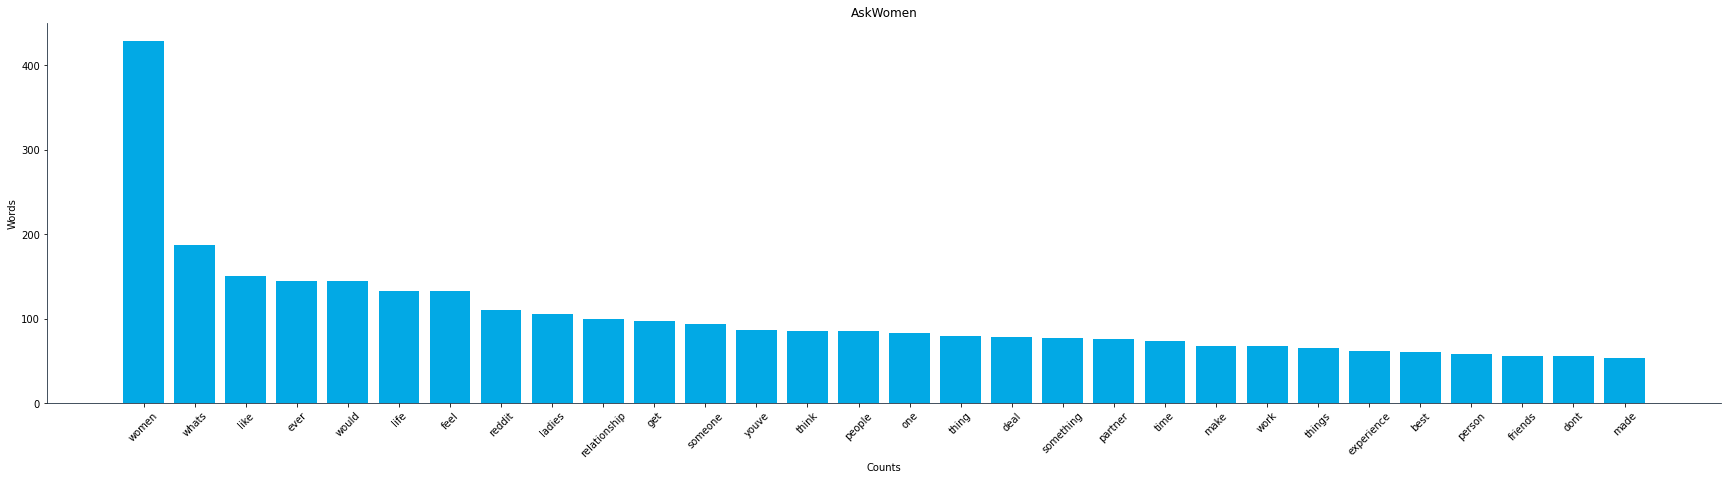

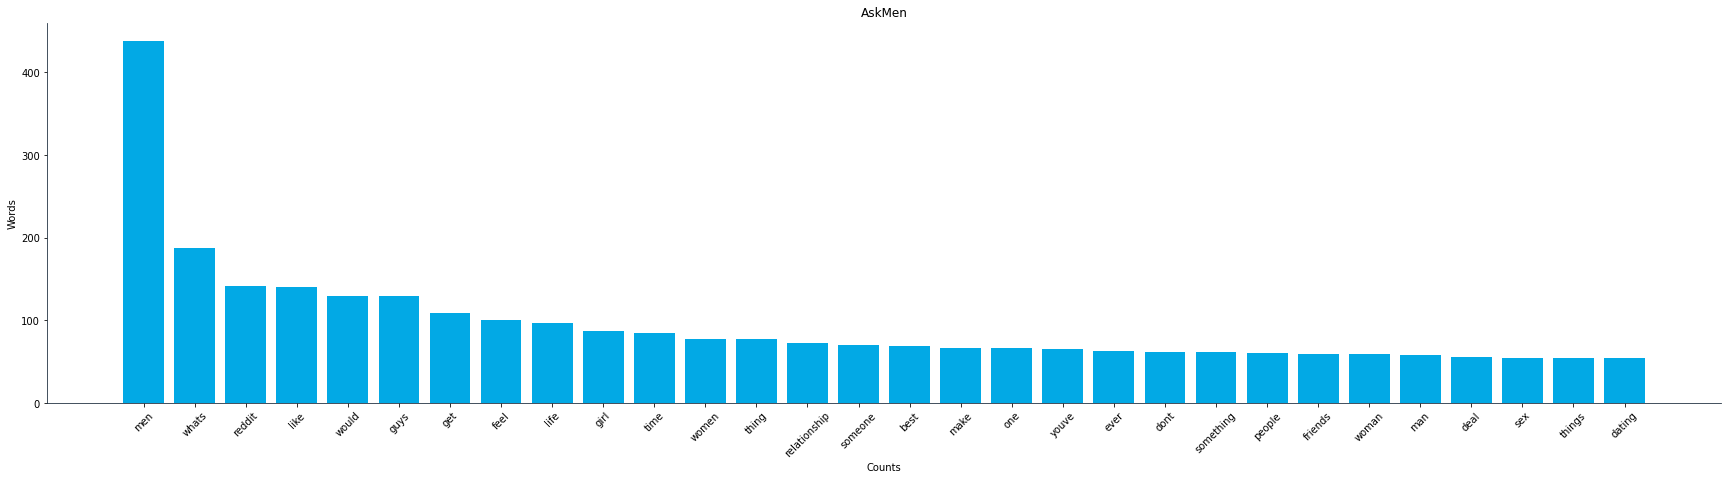

In [20]:
fig = plt.figure(figsize = (number, 7))
ax  = fig.add_subplot(1, 1, 1)
ax.bar(list(askwomen_clean.keys())[:number], list(askwomen_clean.values())[:number], color='#02A9E5')
ax.spines['bottom'].set_color('#18293A')
ax.spines['top'].set_color(None) 
ax.spines['right'].set_color(None)
ax.spines['left'].set_color('#18293A')
ax.title.set_text('AskWomen')
ax.tick_params(axis = 'x', labelrotation = 45)
ax.set_ylabel('Words')
ax.set_xlabel('Counts')
plt.show()  

fig = plt.figure(figsize = (number ,7))
ax  = fig.add_subplot(1, 1, 1)
ax.bar(list(askmen_clean.keys())[:number], list(askmen_clean.values())[:number], color='#02A9E5')
ax.spines['bottom'].set_color('#18293A')
ax.spines['top'].set_color(None) 
ax.spines['right'].set_color(None)
ax.spines['left'].set_color('#18293A')
ax.title.set_text('AskMen')
ax.tick_params(axis = 'x', labelrotation = 45)
ax.set_ylabel('Words')
ax.set_xlabel('Counts')
plt.show()

These are pretty boring because their just common words that are used in both data.
Lets remove all words that appear in both and see what we have left, unique to either set.

In [21]:
unique_women = dict()                       # Define a dictionary
for i in list(askwomen_clean):              # Iterate through askwomen
  if i not in list(askmen_clean):           # If the word is not in askmen add it to the dictionary with a count
    unique_women[i] = askwomen_clean[i]

unique_men = dict()                         # Same for askmen
for i in list(askmen_clean):
  if i not in list(askwomen_clean):
    unique_men[i] = askmen_clean[i]

In [22]:
print(f'AskWomen Unique Words : {len(unique_women)}')
print(f'AskMen Unique Words   : {len(unique_men)}')

AskWomen Unique Words : 1880
AskMen Unique Words   : 1573


We still have quite a lot of words.

Lets now sort the dictionary in reverse order again.

In [23]:
unique_men = dict(sorted(unique_men.items(), key=lambda x: x[1], reverse=True))
unique_women = dict(sorted(unique_women.items(), key=lambda x: x[1], reverse=True))

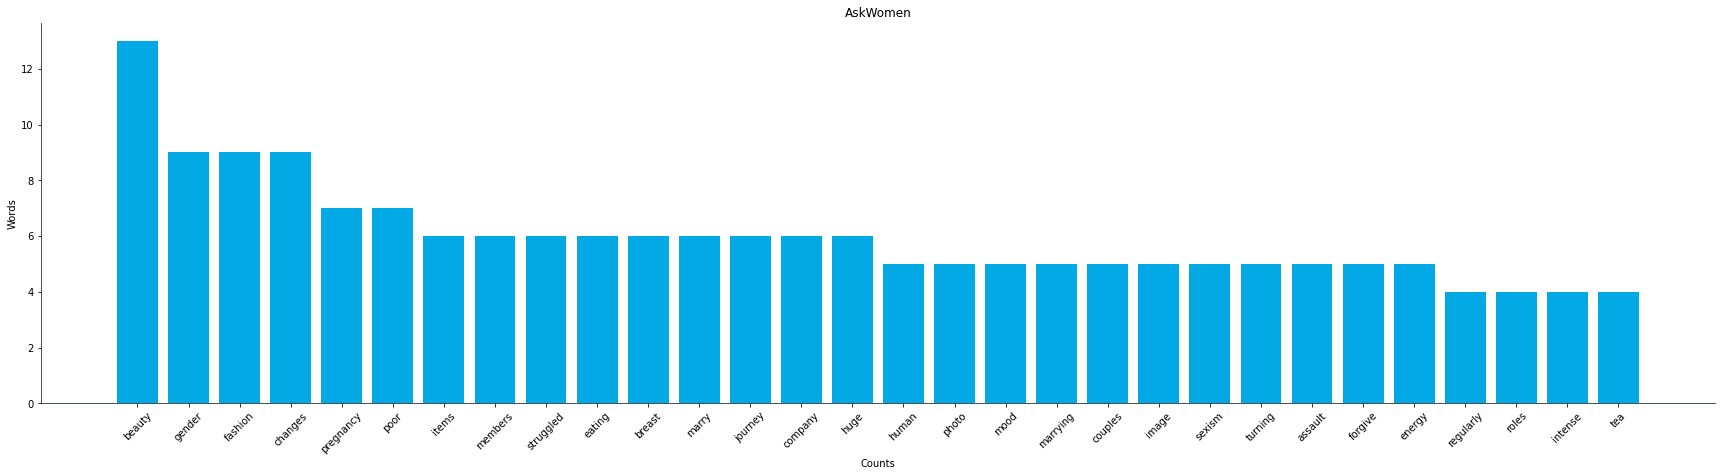

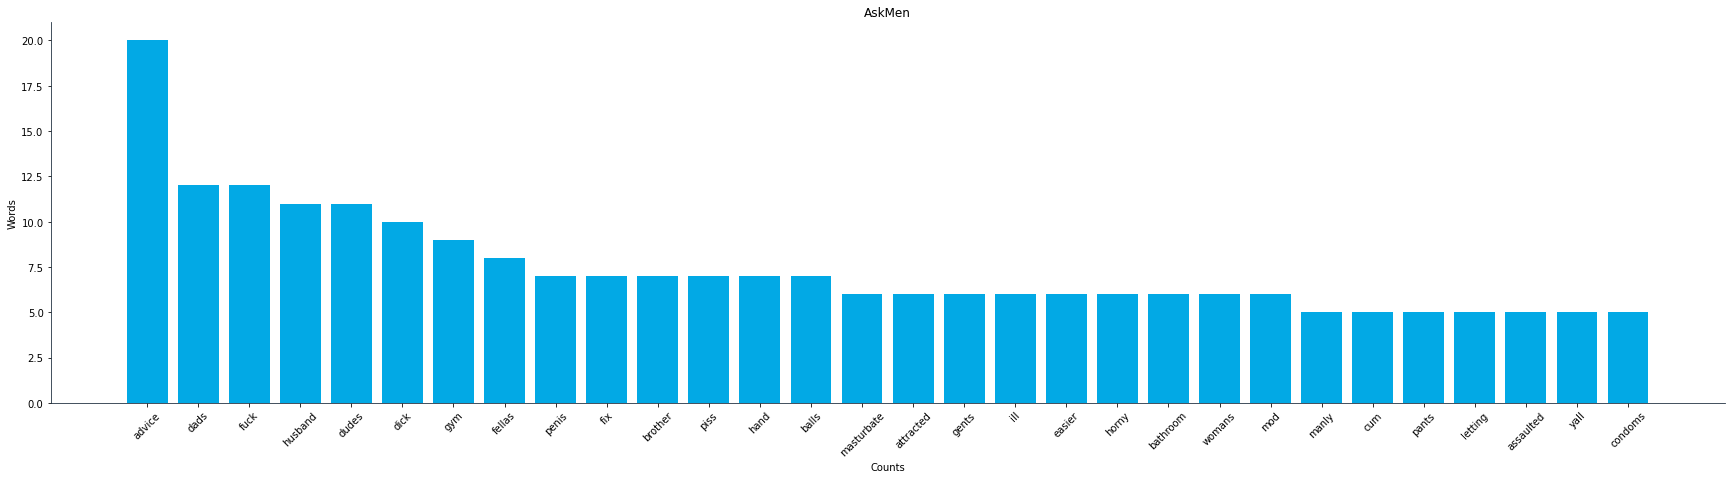

In [25]:
fig = plt.figure(figsize = (number,7))
ax  = fig.add_subplot(1, 1, 1)                        # Defining ax allows for the customisation of axes and text.

## Plot the bar chart
ax.bar(list(unique_women.keys())[:number], list(unique_women.values())[:number], color='#02A9E5')

## Adjust colours of axes.
ax.spines['bottom'].set_color('#18293A')
ax.spines['top'].set_color(None) 
ax.spines['right'].set_color(None)
ax.spines['left'].set_color('#18293A')

## Rotate x labels so it's easier to read the wordsd
ax.tick_params(axis = 'x', labelrotation = 45)

## Axis labels andd title!
ax.title.set_text('AskWomen')
ax.set_ylabel('Words')
ax.set_xlabel('Counts')
plt.show()  


## Repeat
fig = plt.figure(figsize = (number,7))
ax  = fig.add_subplot(1, 1, 1)
ax.bar(list(unique_men.keys())[:number], list(unique_men.values())[:number], color='#02A9E5')
ax.spines['bottom'].set_color('#18293A')
ax.spines['top'].set_color(None) 
ax.spines['right'].set_color(None)
ax.spines['left'].set_color('#18293A')
ax.tick_params(axis = 'x', labelrotation = 45)
ax.title.set_text('AskMen')
ax.set_ylabel('Words')
ax.set_xlabel('Counts')
plt.show()

Ahhhh yes... now we see the differences. Somewhat typical of askmen to have 'dick', 'fuck', 'balls', 'horny' and 'piss' and askwomen to have 'breast', 'pregnancy', 'marry', 'sexism' and 'assault'... I can't see any stark differences here in the questions being asked to either of these genders.

## Word Cloud

We can visualise these words in a word cloud where the most frequent words appear larger.

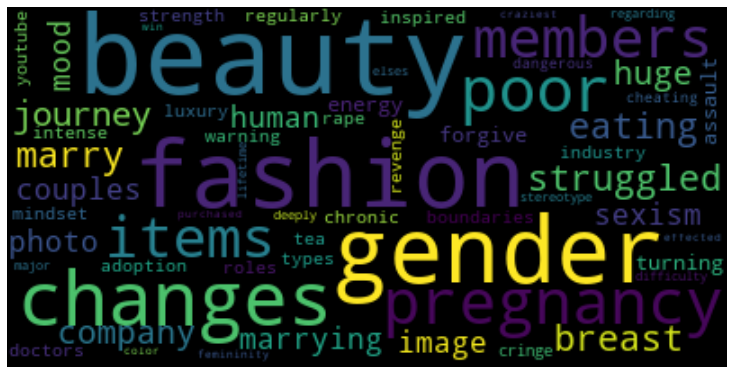

In [31]:
wordcloud = WordCloud(max_font_size=60, max_words=60, background_color="black").generate_from_frequencies(unique_women)     ## Generate the word cloud first.
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)                                                           # To remove the white border (mainly for saving the image).
plt.show()

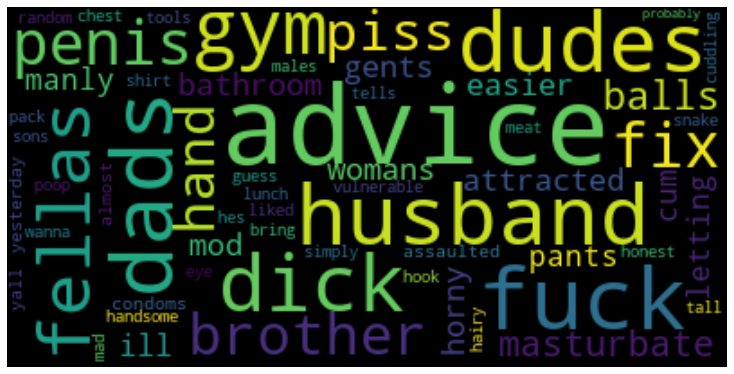

In [30]:
wordcloud = WordCloud(max_font_size=60, max_words=60, background_color="black").generate_from_frequencies(unique_men)    ## Generate the word cloud first.
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)                                                        # To remove the white border (mainly for saving the image).
plt.show()

## Searching the Data

In [39]:
def find_words( dataframe, word ):

  for i in range(len(dataframe)):
    if word in dataframe['title'].iloc[i]:
      print('\t-',dataframe['title'].iloc[i], '\n')

In [40]:
find_words(askwomen_df, 'beauty')

	- Apart from beauty, what are the qualities you possess that nobody will resist? 

	- How do/did you cope with not fitting the beauty standards? 

	- when women say they're going for a facial at the beauty clinic, what exactly is a facial? what are r they actually having done to their face? 

	- What was your “beauty is pain” story that you endured for much longer than you should have? 

	- What hair/beauty treatment did you learn in Lockdown/quarantine, that you won’t be paying for now that salons are open? 

	- What do you mean by beauty? 

	- What are your best low maintenance beauty tips? 

	- What are some grooming/hygiene/beauty tips that you had to pick up on as an adult that seem obvious to others? 

	- How have you learnt to be able to admire someone else's beauty without questioning your own? 

	- What fashion/beauty no-nos do you personally like? 

	- Women who took part in child beauty pageants who have now reached adulthood, what are your opinions on them? 

	- What suppo

# Question Sentiment

There are two methods of sentiment analysis and we could perform it on either questions as a whole or the individual words. He we will perform it on the questions. 

VADER is the sentiment analysis tool that was used in the blog but it is interesting to compare methods so TextBlob is introduced here as an additional method.

## Vader Sentiment

### Packages

In [41]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.9MB/s 


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [43]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

### Method

In [44]:
def get_polarity_scores( dataframe ):

  analyser = SentimentIntensityAnalyzer()

  scores = []
  for i in range(len(dataframe)):
    scores.append(list(analyser.polarity_scores(dataframe['title'][i]).values()))
  
  return pd.DataFrame(np.array(scores), columns = list(analyser.polarity_scores(dataframe['title'][0])))

In [45]:
askmen_scores = get_polarity_scores(askmen_df)
askwomen_scores = get_polarity_scores(askwomen_df)

Check that there are the correct number of scores to the number of questions.

In [ ]:
print(len(askmen_df))
print(len(askmen_scores))

1913
1913


In [46]:
print(len(askwomen_df))
print(len(askwomen_scores))

1907
1907


Let's look at the distribution of the sentiment scores between men and women.

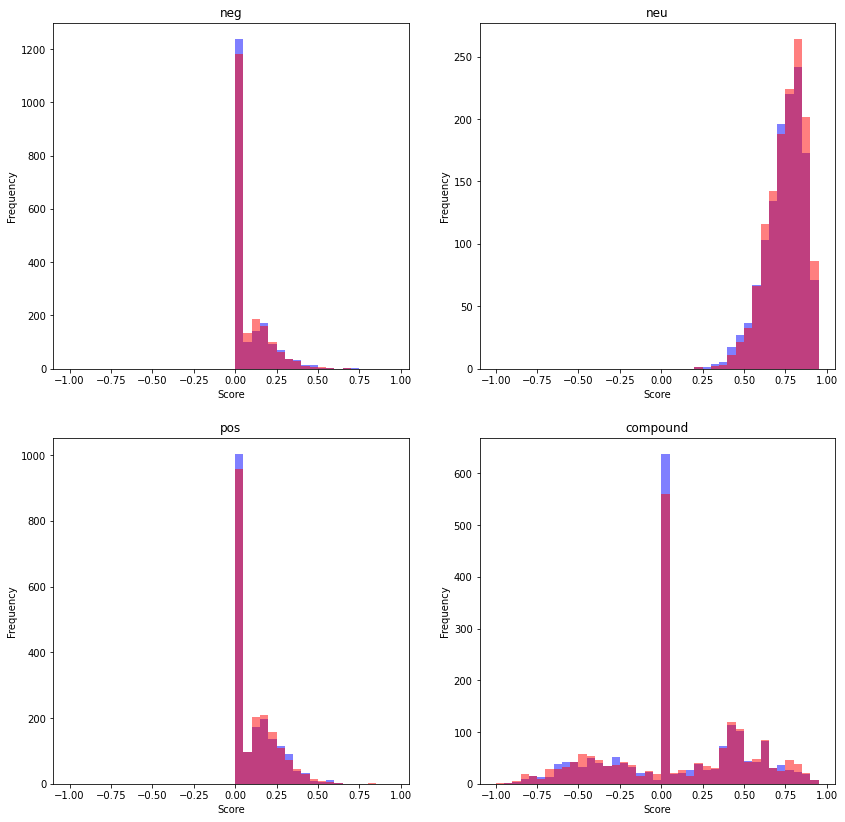

In [47]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
axs = axs.flatten()

cols = askmen_scores.columns
for i in range(4):
  ax = axs[i]
  ax.hist(askmen_scores[cols[i]], bins = [i/100 for i in range(-100,100, 5)], color = 'blue', alpha = 0.5, label = 'askmen')
  ax.hist(askwomen_scores[cols[i]], bins = [i/100 for i in range(-100,100, 5)], color = 'red', alpha = 0.5, label = 'askwomen')
  ax.set_xlabel('Score')
  ax.set_ylabel('Frequency')
  ax.title.set_text(cols[i])

plt.show()


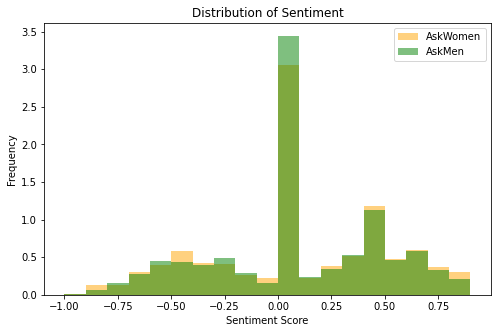

In [51]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)


ax.hist(askwomen_scores['compound'], bins = [i/100 for i in range(-100,100, 10)], density=1, alpha = 0.5, color = 'orange', label = 'AskWomen')
ax.hist(askmen_scores['compound'], bins = [i/100 for i in range(-100,100, 10)], density=1, alpha = 0.5, color = 'green', label = 'AskMen')
ax.set_title('Distribution of Sentiment')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

Find Most Polarised Questions

In [52]:
women_high_idx = askwomen_scores['compound'].tolist().index(max(askwomen_scores['compound']))
women_low_idx  = askwomen_scores['compound'].tolist().index(min(askwomen_scores['compound']))

men_high_idx = askmen_scores['compound'].tolist().index(max(askmen_scores['compound']))
men_low_idx  = askmen_scores['compound'].tolist().index(min(askmen_scores['compound']))

In [53]:
print('AskWomen')
print('Positive:\t', askwomen_df['title'].iloc[women_high_idx])
print('Negative:\t', askwomen_df['title'].iloc[women_low_idx],'\n')

print('AskMen')
print('Positive:\t', askmen_df['title'].iloc[men_high_idx])
print('Negative:\t', askmen_df['title'].iloc[men_low_idx],'\n')

AskWomen
Positive:	 For those who feel your best friend is your partner, do you feel like you're missing out on the Best Friend experience and why?
Negative:	 Let’s bend space and time and say in Charlie and the Chocolate factory there was a sixth ticket and you were chosen! Unfortunately you aren’t Charlie so you have to die (or suffer serious injury) a candy death. How are you most likely to die? 

AskMen
Positive:	 I've learned that having a partner who lets you laugh carefree is an amazing feeling that I never knew was so important. What's something positive you learned was important to you based on your recent relationship?
Negative:	 How do you deal with the loss of animals? I feel so weak, so naked, loss of words without my best friends. 



## TextBlob

This is another pretrained algorithm for sentiment anaylsis. Just to see if it gave similar results to VADER.

In [54]:
from textblob import TextBlob

In [55]:
def get_textBlob_score(sent):
  return TextBlob(sent).sentiment.polarity

In [56]:
askmen_blob_scores = []
for i in range(len(askmen_df)):
  askmen_blob_scores.append(TextBlob(askmen_df['title'][i]).sentiment.polarity)
  
askwomen_blob_scores = []
for i in range(len(askwomen_df)):
  askwomen_blob_scores.append(TextBlob(askwomen_df['title'][i]).sentiment.polarity)

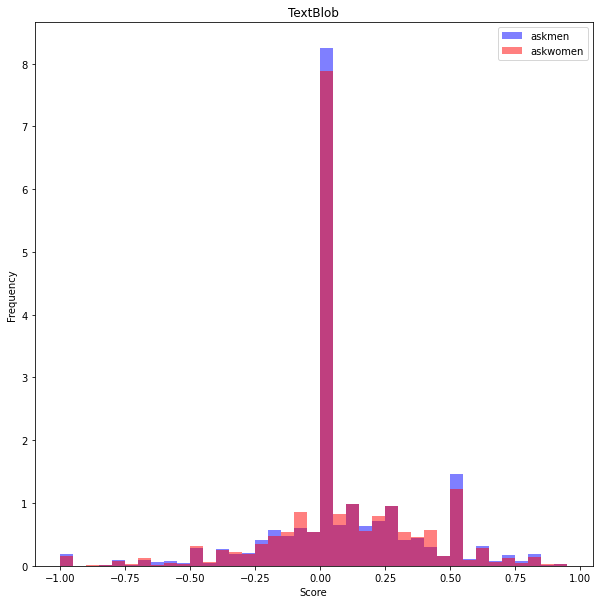

In [57]:
plt.figure(figsize = (10,10))
plt.hist(askmen_blob_scores, color = 'blue', bins = [i/100 for i in range(-100,100, 5)], density = 1, alpha = 0.5, label = 'askmen')
plt.hist(askwomen_blob_scores, color = 'red', bins = [i/100 for i in range(-100,100, 5)], density = 1, alpha = 0.5, label = 'askwomen')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('TextBlob')
plt.legend()
plt.show()

In [58]:
am_err = np.std(askmen_blob_scores)/np.sqrt(len(askmen_blob_scores))
aw_err = np.std(askwomen_blob_scores)/np.sqrt(len(askwomen_blob_scores))

print('Mean AskMen: {:.3f} +/- {:.3f}'.format(np.mean(askmen_blob_scores) , am_err))
print('Mean AskWomen: {:.3f} +/- {:.3f}'.format(np.mean(askwomen_blob_scores) , aw_err))

Mean AskMen: 0.085 +/- 0.007
Mean AskWomen: 0.082 +/- 0.007


In [59]:
women_high_idx = askwomen_blob_scores.index(max(askwomen_blob_scores))
women_low_idx  = askwomen_blob_scores.index(min(askwomen_blob_scores))

men_high_idx = askmen_blob_scores.index(max(askmen_blob_scores))
men_low_idx  = askmen_blob_scores.index(min(askmen_blob_scores))

In [60]:
print('AskWomen')
print('Positive:\t', askwomen_df['title'].iloc[women_high_idx])
print('Negative:\t', askwomen_df['title'].iloc[women_low_idx],'\n')

print('AskMen')
print('Positive:\t', askmen_df['title'].iloc[men_high_idx])
print('Negative:\t', askmen_df['title'].iloc[men_low_idx],'\n')

AskWomen
Positive:	 What’s the best way to show a woman respect?
Negative:	 What is the worst argument you've ever been in with your partner? How did you end up solving it? 

AskMen
Positive:	 Best playlists for when you’re doing the deed?
Negative:	 What nasty habits are you trying to break? 



Through some not-very-legit stats and quite a few assumptions, we can say that these are not significantly different.